<a href="https://colab.research.google.com/github/talaricoferreira/mestrado/blob/main/testes_Baysiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testes com Algoritimo de Baysiana tirada do Artigo de Holmes ans Held (2006)
[Implementação em R do Artigo](https://rstudio-pubs-static.s3.amazonaws.com/208180_b659633007eb45aa9c48e4c50b8afc07.html)



---



##Importando Bibliotecas

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
random.seed(42) # define the seed (important to reproduce the results)
from sklearn import datasets
from sklearn.decomposition import PCA
import pymc as pm
import tensorflow as tf
import tensorflow_probability as tfp
from scipy.stats import truncnorm
import statsmodels.api as smf
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, multivariate_normal

##Usando o Dataset Iris como Teste
Por ser uma base de dados conhecida é mais facil usa-la para testar o algoritimo, aqui já fazendo o *split* da base

In [2]:
iris = datasets.load_iris()
y = iris.target_names[iris.target] #caso queira se usar as variaveis categoricas
y_target=iris.target #caso se queira usar as variaveis como inteiros
X = iris.data
p = 0.3 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

##Função que faz o *fit* da base

In [3]:
def probit(y,X,target):
    """
    Performs Probity model for Any Classes

    Args:
      X: A array  contaiining the features.
      y: A NumPy array of shape (n, 1) containing the labels.
      target: Thr label that  want probit distribuition.


    Returns:
      Probit distribuition for target
    """
    yresult= np.where(y==target,1,0)
    #print(yresult)
    #calcular probit da amostra
    probit_model=smf.Probit(yresult,X)
    result=probit_model.fit()
    return result

##Testando a função Probit

In [4]:
#print(y_train)
#x_coluna = X_train['test1','teste2']
X_pd = teste = pd.DataFrame(X_train,columns=iris.feature_names,)
resultado = probit(y_train,X_pd, 'versicolor')
teste = pd.DataFrame(resultado.params,columns=['coef'],)
#parametros= pd.DataFrame(resultado.params)
#mtriz = np.dot(X_pd,teste['coef'])
mtriz= X_pd@teste['coef']
#mtriz=teste['coef']@X_pd.T
print(mtriz)

Optimization terminated successfully.
         Current function value: 0.527006
         Iterations 6
0    -1.336046
1    -0.625138
2    -1.970606
3    -0.826395
4    -0.023516
5     0.173032
6    -0.543509
7     0.219488
8    -1.705458
9    -1.239944
10   -0.743568
11   -0.762262
12   -0.801703
13    0.300394
14   -0.807368
15   -0.216839
16    0.119855
17    0.498352
18    0.203323
19   -0.996129
20   -0.642482
21    0.881329
22   -1.031766
23   -1.540018
24   -0.110687
25   -1.819975
26    0.808632
27   -1.004617
28   -1.385216
29   -0.339611
30    0.190512
31    0.803553
32   -0.215121
33   -0.280236
34   -0.258659
35    1.036440
36    0.199628
37   -1.337322
38   -0.906600
39   -0.390914
40   -0.030313
41   -1.037970
42   -1.201634
43    0.229414
44   -0.201874
dtype: float64


## Imprimindo o Gráfico
Deu ruim, não saiu um grafico decente

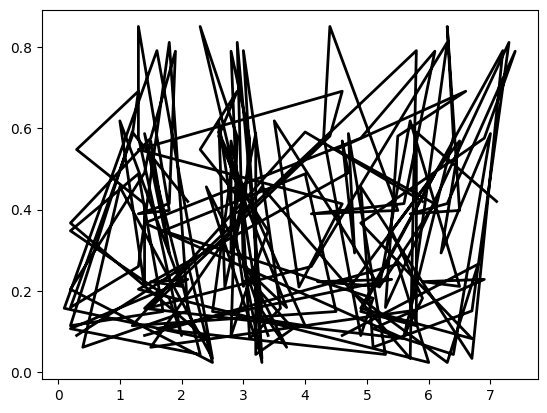

In [5]:
fig, ax = plt.subplots(1, 1)

#ax.plot(X_pd, norm.cdf(np.dot(X_pd,teste['coef'])),'k-', lw=2)
ax.plot(X_pd, norm.cdf(mtriz),'k-', lw=2)
plt.show()

##Implementação do modelo aumentado
Grafico continua ruim

[0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 1 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


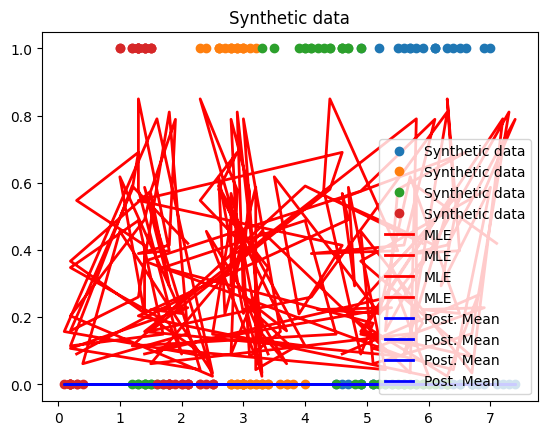

In [8]:
# Required libraries
#import numpy as np
#from scipy.stats import truncnorm, multivariate_normal
#import matplotlib.pyplot as plt

#trecho para inicializare as váriaveis
X = X_train
x=X
y= np.where(y_train=='versicolor',1,0)
print(y)
#fim do trecho

# Conjugate prior on the coefficients theta ~ N(theta_0, Q_0)
theta_0 = np.zeros(X.shape[1])  # D = X.shape[1]
Q_0 = np.diag(np.repeat(10, X.shape[1]))

# Initialize parameters
theta = np.zeros(X.shape[1])
z = np.zeros(len(x))  # N = len(x)
print(z)
# Number of simulations for Gibbs sampler
N_sim = 10000
# Burn-in period
burn_in = 5000
# Matrix storing samples of the theta parameter
theta_chain = np.zeros((N_sim, X.shape[1]))

# ---------------------------------
# Gibbs sampling algorithm
# ---------------------------------

# Compute posterior variance of theta
prec_0 = np.linalg.inv(Q_0)
V = np.linalg.inv(prec_0 + X.T @ X)

for t in range(1, N_sim):
    # Update Mean of z
    mu_z = X @ theta
    N0 = np.sum(y == 0)

    N1 = np.sum(y == 1)

    # Draw latent variable z from its full conditional: z | theta, y, X
    z[y == 0] = truncnorm.rvs(-np.inf, 0, loc=mu_z[y == 0], scale=1, size=N0)
    z[y == 1] = truncnorm.rvs(0, np.inf, loc=mu_z[y == 1], scale=1, size=N1)

    # Compute posterior mean of theta
    M = V @ (prec_0 @ theta_0 + X.T @ z)
    # Draw variable theta from its full conditional: theta | z, X
    theta = multivariate_normal.rvs(M, V)

    # Store the theta draws
    theta_chain[t, :] = theta

# ---------------------------
# Get posterior mean of theta
# ---------------------------
post_theta = np.mean(theta_chain[burn_in:, :], axis=0)
# Compute MLE estimate of theta

# Plot covariates x versus observations y
plt.plot(x, y, 'o', label='Synthetic data')
# Show the fitted function using the posterior mean estimates
plt.plot(x, norm.cdf(mtriz), color='red', linewidth=2, label='MLE') #usa a matriz calculada anteriormente
plt.plot(x, norm.cdf(X @ post_theta), color='blue', linewidth=2, label='Post. Mean')
plt.title('Synthetic data')
plt.legend(loc='lower right')
plt.show()
